In [28]:
import pandas as pd
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Read the data
mall_data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset to understand its structure
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\astra\AppData\Local\Temp\ipykernel_1448\2653197128.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=mall_data, palette='Set2')


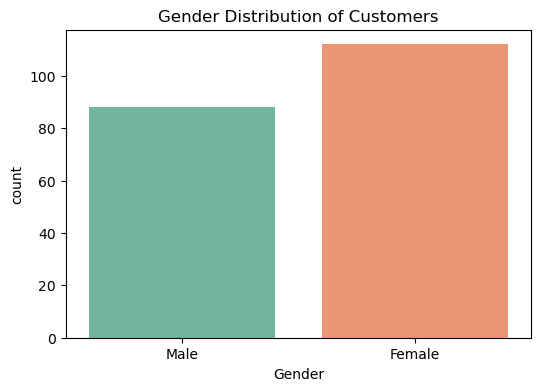

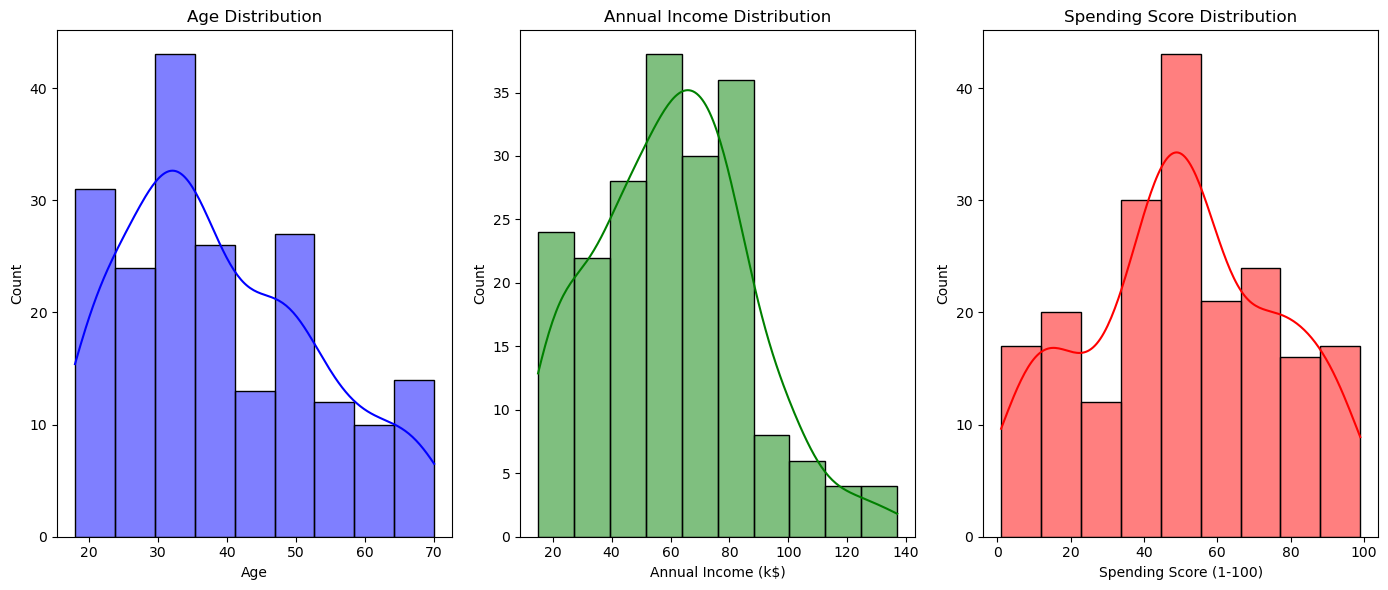

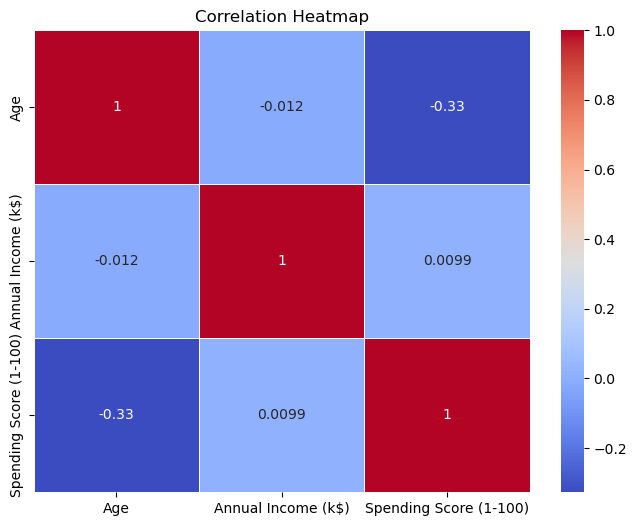

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 1: Exploratory Data Analysis (EDA)

# Check for missing values
missing_values = mall_data.isnull().sum()

# Descriptive statistics
descriptive_stats = mall_data.describe()

# Gender distribution visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=mall_data, palette='Set2')
plt.title('Gender Distribution of Customers')
plt.show()

# Distribution of Age, Income, and Spending Score
plt.figure(figsize=(14, 6))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(mall_data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

# Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(mall_data['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(mall_data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap (for numeric features)
plt.figure(figsize=(8, 6))
corr = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

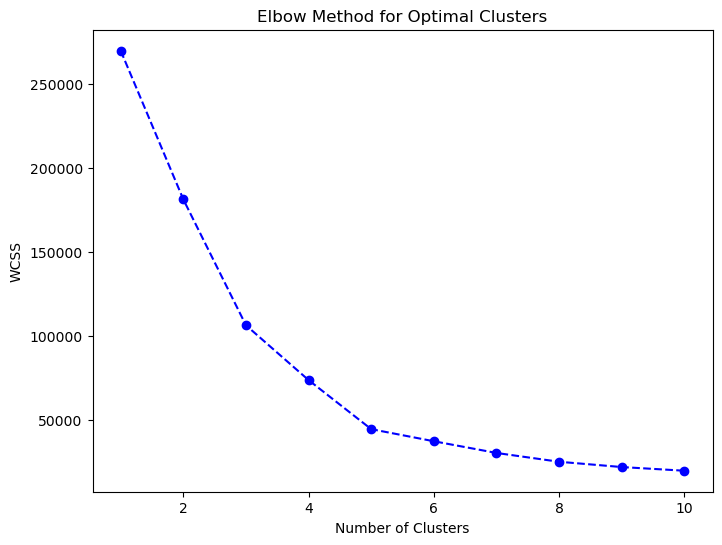

C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


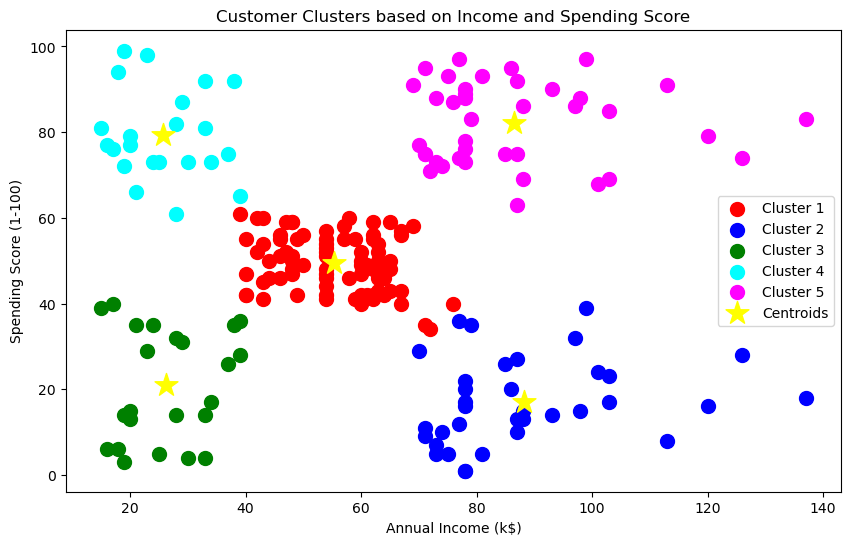

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000)

In [31]:
# Step 2: K-Means Clustering Model

# Selecting features for clustering
X = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, let's choose 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

y_kmeans = kmeans.fit_predict(X)

# Add the cluster assignments to the dataset
mall_data['Cluster'] = y_kmeans

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Customer Clusters based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

missing_values, descriptive_stats


Improving the cluster algorithm

C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

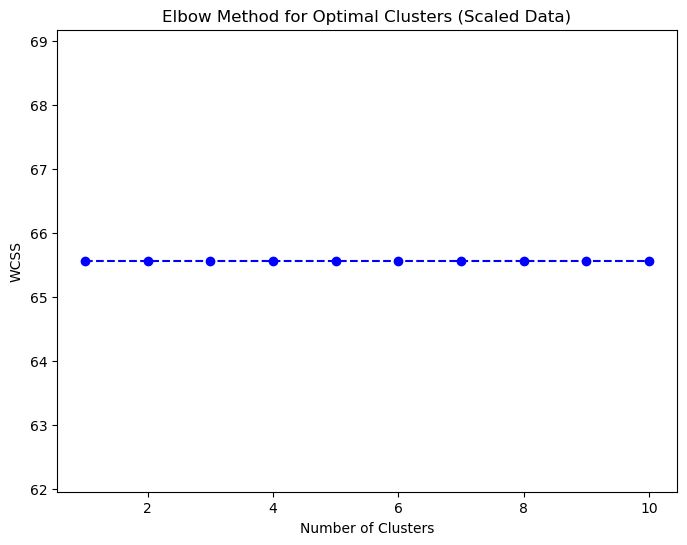

C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\astra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


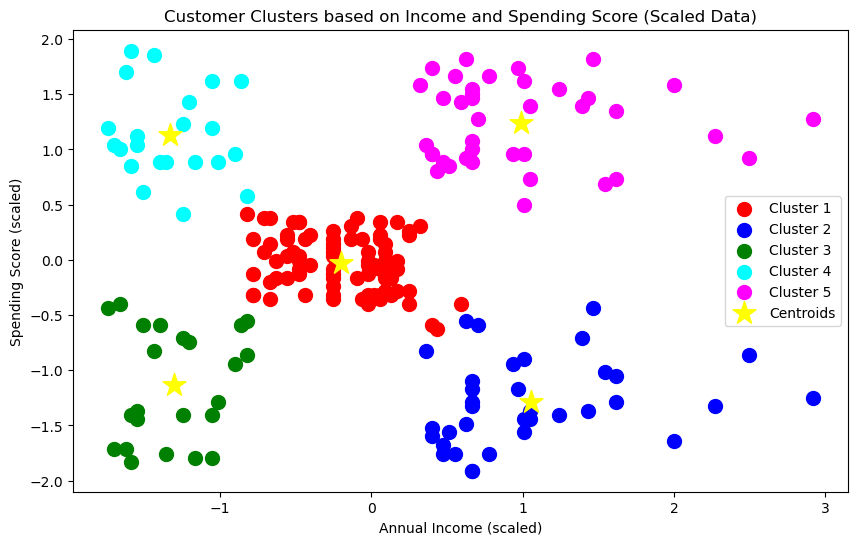

In [34]:
from sklearn.preprocessing import StandardScaler

# Step 1: Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Perform K-Means clustering again with the scaled data
wcss_scaled = []
for i in range(1, 11):
    kmeans_scaled = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

    kmeans_scaled.fit(X_scaled)
    wcss_scaled.append(kmeans_scaled.inertia_)

# Plot the Elbow Method results for the scaled data
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_scaled, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal Clusters (Scaled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, let's choose 5 clusters again for scaled data
kmeans_scaled_final = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans_scaled = kmeans_scaled_final.fit_predict(X_scaled)

# Visualize the clusters for scaled data
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans_scaled == 0, 0], X_scaled[y_kmeans_scaled == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans_scaled == 1, 0], X_scaled[y_kmeans_scaled == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans_scaled == 2, 0], X_scaled[y_kmeans_scaled == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans_scaled == 3, 0], X_scaled[y_kmeans_scaled == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans_scaled == 4, 0], X_scaled[y_kmeans_scaled == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot the cluster centers
plt.scatter(kmeans_scaled_final.cluster_centers_[:, 0], kmeans_scaled_final.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Customer Clusters based on Income and Spending Score (Scaled Data)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()
